In [1]:
#Sentiment Analysis of reviews of a clothing brand 

In [2]:
#import the necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk 

In [3]:
#Reading the data 
reviews = pd.read_csv("C:/Users/neant/OneDrive/Desktop/Projects/Clothing Reviews Sentiment Analysis/Clothing Reviews.csv")
reviews.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
reviews['id'] = range(1, len(reviews) + 1)
reviews = reviews.drop("Unnamed: 0", axis =1)
#Moving the index to the first column in the data frame 
first_column = reviews.pop('id')
reviews.insert(0, 'id', first_column)
reviews.head()

,id,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,1,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,2,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,3,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,4,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,5,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
#getting the first review of the dataframe
reviews['Review Text'][0]

'Absolutely wonderful - silky and sexy and comfortable'

In [6]:
#checking the dimensions of the dataframe
reviews.shape

(23486, 11)

In [7]:
#The dataset has 23486 reviews in total with 11 features 

In [8]:
#EDA 

In [9]:
#Check the number of times each rating point occurs 
reviews['Rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

C:\Users\neant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


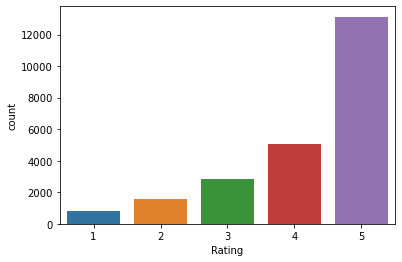

In [10]:
#putting the above in a bar plot 
sns.countplot('Rating', data = reviews)
plt.show()

In [11]:
#Just taking 1 review randomly as an example , here taking the 100th review in the data set as our example review 
sample_review = reviews['Review Text'][100]
sample_review

"At first i wasn't sure about it. the neckline is much lower and wavy than i thought. but after wearing it, it really is comfortable. it stretches a lot, so i wear a cami underneath so when i lean forward i'm not showing the world my torso."

In [12]:
#Tokenizing the sample_review sentance 
tokens = nltk.word_tokenize(sample_review)
tokens

['At',
 'first',
 'i',
 'was',
 "n't",
 'sure',
 'about',
 'it',
 '.',
 'the',
 'neckline',
 'is',
 'much',
 'lower',
 'and',
 'wavy',
 'than',
 'i',
 'thought',
 '.',
 'but',
 'after',
 'wearing',
 'it',
 ',',
 'it',
 'really',
 'is',
 'comfortable',
 '.',
 'it',
 'stretches',
 'a',
 'lot',
 ',',
 'so',
 'i',
 'wear',
 'a',
 'cami',
 'underneath',
 'so',
 'when',
 'i',
 'lean',
 'forward',
 'i',
 "'m",
 'not',
 'showing',
 'the',
 'world',
 'my',
 'torso',
 '.']

In [13]:
#finding the part of speech tags for each of the tokens 
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\neant\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('At', 'IN'),
 ('first', 'JJ'),
 ('i', 'NN'),
 ('was', 'VBD'),
 ("n't", 'RB'),
 ('sure', 'JJ'),
 ('about', 'IN'),
 ('it', 'PRP'),
 ('.', '.'),
 ('the', 'DT'),
 ('neckline', 'NN'),
 ('is', 'VBZ'),
 ('much', 'JJ'),
 ('lower', 'JJR'),
 ('and', 'CC'),
 ('wavy', 'JJR'),
 ('than', 'IN'),
 ('i', 'JJ'),
 ('thought', 'NN'),
 ('.', '.'),
 ('but', 'CC'),
 ('after', 'IN'),
 ('wearing', 'VBG'),
 ('it', 'PRP'),
 (',', ','),
 ('it', 'PRP'),
 ('really', 'RB'),
 ('is', 'VBZ'),
 ('comfortable', 'JJ'),
 ('.', '.'),
 ('it', 'PRP'),
 ('stretches', 'VBZ'),
 ('a', 'DT'),
 ('lot', 'NN'),
 (',', ','),
 ('so', 'IN'),
 ('i', 'JJ'),
 ('wear', 'VBP'),
 ('a', 'DT'),
 ('cami', 'JJ'),
 ('underneath', 'NN'),
 ('so', 'IN'),
 ('when', 'WRB'),
 ('i', 'JJ'),
 ('lean', 'VBP'),
 ('forward', 'RB'),
 ('i', 'JJ'),
 ("'m", 'VBP'),
 ('not', 'RB'),
 ('showing', 'VBG'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('my', 'PRP$'),
 ('torso', 'NN'),
 ('.', '.')]

In [14]:
#geting an output showing part of speech tags, each code has a meaning. For example NN is a noun

In [15]:
#Using Vader for further analysis 
#importing necessary libraries and functions for this 
from nltk.sentiment import SentimentIntensityAnalyzer 
from tqdm.notebook import tqdm 
#Initializing the Sentiment Intensity Analyzer Object 
sia = SentimentIntensityAnalyzer() 
#the object will give  us a polarity score for each sentance for example
sia.polarity_scores("I am so happy that I finally got a job")

{'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound': 0.6115}

In [16]:
#The above example sentance is an overall positiove sentence as the compound score here is more towards 1 

In [17]:
#lets try it for a negative score 
sia.polarity_scores("I am not at all happy with the way things are")

{'neg': 0.25, 'neu': 0.75, 'pos': 0.0, 'compound': -0.4585}

In [18]:
#The above sentance is mostly negative as the compound score is negative 

In [19]:
#running polarity score on out sample_review 
sia.polarity_scores(sample_review)

{'neg': 0.067, 'neu': 0.827, 'pos': 0.106, 'compound': 0.584}

In [20]:
#The sample_review is more on the positive side. 

In [21]:
reviews.dtypes

id                          int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [22]:
reviews['Review Text'][92]

nan

In [23]:
reviews.isnull().sum().sort_values()

id                            0
Clothing ID                   0
Age                           0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
Review Text                 845
Title                      3810
dtype: int64

In [24]:
reviews.dropna(subset = ['Review Text'], inplace = True)
reviews.isnull().sum().sort_values()

id                            0
Clothing ID                   0
Age                           0
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
Title                      2966
dtype: int64

In [25]:
reviews['compound'] = [sia.polarity_scores(x)['compound'] for x in reviews['Review Text']]


In [26]:
reviews['Positive'] = [sia.polarity_scores(x)['pos'] for x in reviews['Review Text']]
reviews['Negative'] = [sia.polarity_scores(x)['neg'] for x in reviews['Review Text']]
reviews['Neutral'] = [sia.polarity_scores(x)['neu'] for x in reviews['Review Text']]
reviews.head()

,id,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,compound,Positive,Negative,Neutral
0,1,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.8932,0.728,0.000,0.272
1,2,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.9729,0.336,0.000,0.664
2,3,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.9427,0.181,0.027,0.792
3,4,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.5727,0.434,0.226,0.340
4,5,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.9291,0.300,0.000,0.700


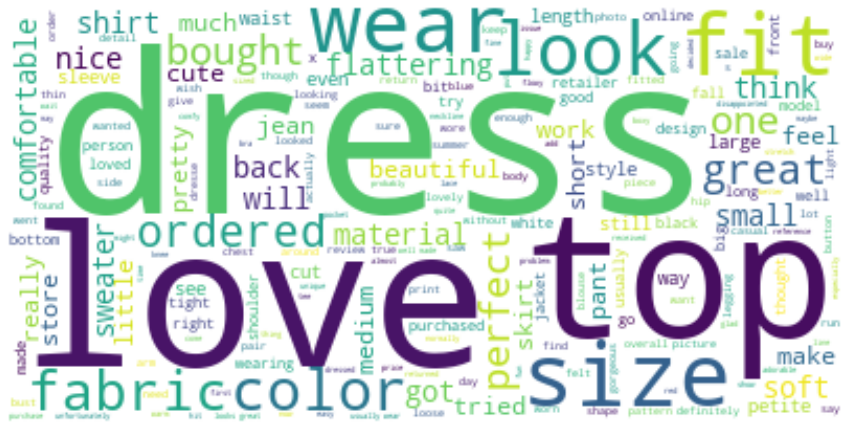

In [27]:
#Building a word cloud for the review text 
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

text = " ".join(i for i in reviews['Review Text'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

C:\Users\neant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


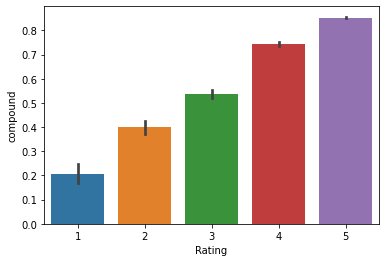

In [28]:
#Checking the relation between ratings and compund polarity score 
sns.barplot(reviews['Rating'], reviews['compound'])
plt.show()

In [29]:
#From the above graph, there are no compound scores with a negative value, even 1 star ratings have a slightly higher
#than 0 compound score. The reviews in this dataset is mostly positive 

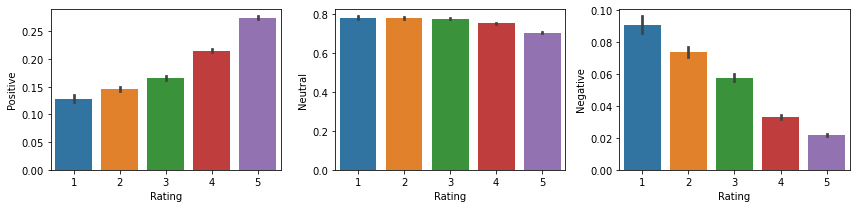

In [30]:
#One more visualization of positive negative and neutral scores side by side
fig, axs = plt.subplots(1,3, figsize=(12,3))
sns.barplot(data = reviews, x= 'Rating', y='Positive', ax = axs[0])
sns.barplot(data = reviews, x= 'Rating', y='Neutral', ax = axs[1])
sns.barplot(data = reviews, x= 'Rating', y='Negative', ax = axs[2])
plt.tight_layout()
plt.show()

In [31]:
#Using Transformer based learning model from hugging face for a deeper analysis : Roberta 
#importing the necessary libraries and functions 
#!pip install transformers 

In [32]:
from transformers import AutoTokenizer 
from transformers import AutoModelForSequenceClassification 
from scipy.special import softmax

In [33]:
#pulling a pretrained on twitter data hugging face model 
#This will pull down model weights that have been stored 
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

C:\Users\neant\anaconda3\lib\site-packages\huggingface_hub\file_download.py:129: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\neant\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [42]:
#just reminding what it looks like in the VADER model
print(sample_review)
vader_polarity = sia.polarity_scores(sample_review)

At first i wasn't sure about it. the neckline is much lower and wavy than i thought. but after wearing it, it really is comfortable. it stretches a lot, so i wear a cami underneath so when i lean forward i'm not showing the world my torso.


In [43]:
#Now running for Roberts Model 
encoded_text = tokenizer(sample_review, return_tensors = 'pt')
output = model(**encoded_text)
#The above gives the output in the tensor format, converting it to numpy 
score = output[0][0].detach().numpy()
#apply softmax 
score = softmax(score)
print(score)

[0.03013124 0.28936553 0.6805033 ]


In [44]:
#Vader also gave an output that the review is a positive one, however roberta has given a stronger positive score to the review 

In [45]:
#Creating a scores dictionary 
score_dict ={ 'roberta_neg':score[0],
               'roberta_neu': score[1],
               'roberta_pos': score[2]}
print(score_dict)

{'roberta_neg': 0.030131241, 'roberta_neu': 0.28936553, 'roberta_pos': 0.6805033}


In [50]:
#compare the scores of roberta and vader for sample_review
del vader_polarity['compound']

In [66]:
plot_data = pd.DataFrame(vader_polarity, index = [0])
plot_data['Model'] = 'Vader'
plot_data.head()

,neg,neu,pos,Model
0,0.067,0.827,0.106,Vader


In [67]:
roberta_data = pd.DataFrame(score_dict, index = [0])
roberta_data = roberta_data.rename(columns={'roberta_neg': 'neg', 'roberta_neu': 'neu','roberta_pos':'pos'})
roberta_data['Model'] = 'Roberta'
roberta_data

,neg,neu,pos,Model
0,0.030131,0.289366,0.680503,Roberta


In [68]:
frames = [plot_data, roberta_data]
final_df = pd.concat(frames)
final_df

,neg,neu,pos,Model
0,0.067000,0.827000,0.106000,Vader
0,0.030131,0.289366,0.680503,Roberta


The above data frame makes it easy to compare the 2 models. cleary shows that the Roberts model is stronger that Vader 